## HT9 - Proyecto 2. Entrega 7
### RNA
Diego Duarte 22075 - José Marchena 22398

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import rna

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

In [3]:
house_prices = rna.drop_many_nulls(house_prices)
house_prices = rna.trans_categorical(house_prices)

e:\DM\RNA\rna.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = km.fit_predict(X_pca)


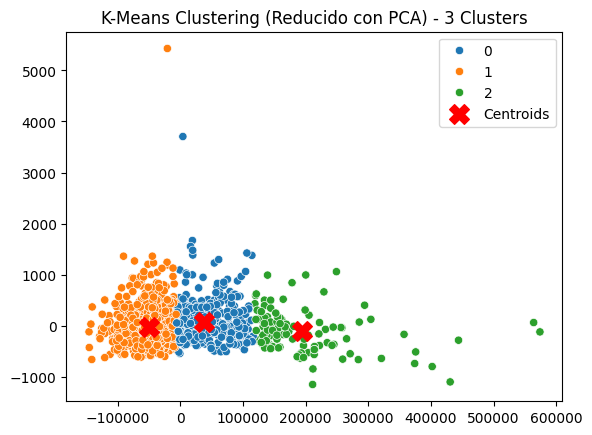

In [4]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict


cluster_set = house_prices[['GrLivArea', 'SalePrice','1stFlrSF','GarageArea']]
cluster_set.dropna()

cluster_set = rna.breif_clustering(cluster_set, 3)

In [5]:
tem = house_prices[house_prices.columns]
object_cols = tem.select_dtypes(include=['object']).columns
fuzzy_hp = pd.get_dummies(tem, columns=object_cols, drop_first=True)
fuzzy_hp['SpThird'] = cluster_set['Cluster']
fuzzy_hp.pop('SalePrice')
fuzzy_hp.groupby('SpThird').size()

SpThird
0    518
1    826
2    116
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_houses = scaler.fit_transform(house_prices)

# Añadir la columna de clusters al DataFrame original
house_prices['price_group'] = cluster_set['Cluster']

# Reemplazar los valores numéricos por etiquetas de texto
label_map = {
    0: 'medio',
    1: 'barato',
    2: 'caro'
}
house_prices['price_group'] = house_prices['price_group'].map(label_map)

### MODELO 1

In [7]:
from sklearn.compose import make_column_selector as selector 


target = house_prices['price_group']
features = house_prices.drop(columns='price_group')

selector_numericas = selector(dtype_exclude=object) #Seleccionamos todas las variables que no son Object
selector_categoricas = selector(dtype_include=object) #Seleccionamos todas las varibles de tipo object
#Seleccionamos las columnas que cumplen con los selectores pasándole los datos
numericas = selector_numericas(features)
categoricas = selector_categoricas(features)


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier

preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = StandardScaler()

preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico,categoricas),
    ('standard_scaler',preprocesador_numerico, numericas)
])

In [9]:
modelo1 = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(5,3)))
modelo1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [10]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target, train_size=0.7,test_size=0.3)
print("Shape train",data_train.shape)
print("Shape test",data_test.shape)
features.isnull().sum()

Shape train (1021, 56)
Shape test (438, 56)


MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
MoSold           0
YrSold      

In [11]:
modelo1.fit(data_train,target_train)

Iteration 1, loss = 1.26989000
Iteration 2, loss = 1.22100894
Iteration 3, loss = 1.17562240
Iteration 4, loss = 1.13070364
Iteration 5, loss = 1.08789592
Iteration 6, loss = 1.04618702
Iteration 7, loss = 1.00764721
Iteration 8, loss = 0.97058155
Iteration 9, loss = 0.93627770
Iteration 10, loss = 0.90442242
Iteration 11, loss = 0.87484158
Iteration 12, loss = 0.84701947
Iteration 13, loss = 0.82059510
Iteration 14, loss = 0.79583330
Iteration 15, loss = 0.77302215
Iteration 16, loss = 0.75182232
Iteration 17, loss = 0.73261850
Iteration 18, loss = 0.71517531
Iteration 19, loss = 0.69867589
Iteration 20, loss = 0.68344354
Iteration 21, loss = 0.66904340
Iteration 22, loss = 0.65564739
Iteration 23, loss = 0.64275222
Iteration 24, loss = 0.63056923
Iteration 25, loss = 0.61891937
Iteration 26, loss = 0.60765642
Iteration 27, loss = 0.59691581
Iteration 28, loss = 0.58650457
Iteration 29, loss = 0.57682383
Iteration 30, loss = 0.56707769
Iteration 31, loss = 0.55814240
Iteration 32, los

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

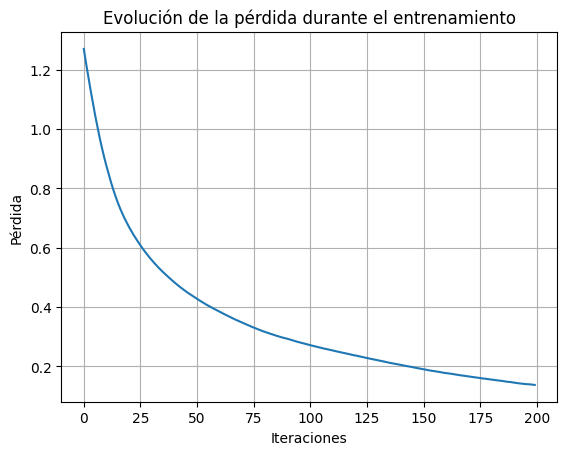

In [12]:
mlp = modelo1.named_steps['mlpclassifier']  # accedemos al estimador final

plt.plot(mlp.loss_curve_)
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid()
plt.show()

In [13]:
pred1 = modelo1.predict(data_test)
pred1[:5]

array(['medio', 'medio', 'medio', 'medio', 'barato'], dtype='<U6')

Precisión del modelo: 0.90
              precision    recall  f1-score   support

      barato       0.94      0.94      0.94       252
        caro       0.93      0.76      0.84        37
       medio       0.84      0.88      0.86       149

    accuracy                           0.90       438
   macro avg       0.90      0.86      0.88       438
weighted avg       0.90      0.90      0.90       438



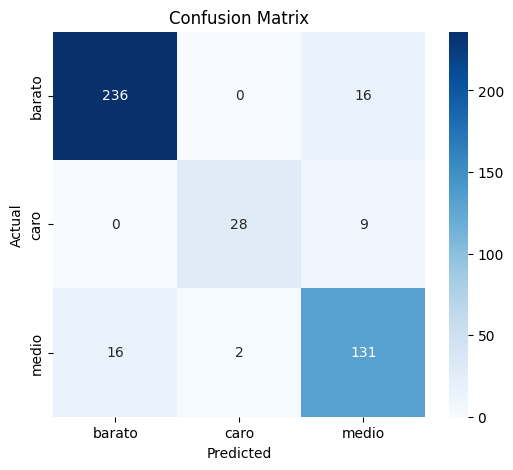

In [14]:
rna.metrics_and_cm(pred1, target_test)

### MODELO 2

In [15]:
modelo2 = make_pipeline(preprocesador,MLPClassifier(activation="relu",verbose=True,hidden_layer_sizes=(50,15), random_state=42))
modelo2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(50, 15), random_state=42,
                               verbose=True))])

In [16]:
modelo2.fit(data_train,target_train)

Iteration 1, loss = 1.01311504
Iteration 2, loss = 0.86037265
Iteration 3, loss = 0.75197497
Iteration 4, loss = 0.67001591
Iteration 5, loss = 0.60417051
Iteration 6, loss = 0.54862513
Iteration 7, loss = 0.50271930
Iteration 8, loss = 0.46443968
Iteration 9, loss = 0.43124006
Iteration 10, loss = 0.40377977
Iteration 11, loss = 0.37980112
Iteration 12, loss = 0.35854739
Iteration 13, loss = 0.33866644
Iteration 14, loss = 0.32189330
Iteration 15, loss = 0.30855760
Iteration 16, loss = 0.29403752
Iteration 17, loss = 0.28291886
Iteration 18, loss = 0.27121948
Iteration 19, loss = 0.26075225
Iteration 20, loss = 0.25133016
Iteration 21, loss = 0.24268717
Iteration 22, loss = 0.23413968
Iteration 23, loss = 0.22468915
Iteration 24, loss = 0.21709754
Iteration 25, loss = 0.20983892
Iteration 26, loss = 0.20220326
Iteration 27, loss = 0.19557332
Iteration 28, loss = 0.18938311
Iteration 29, loss = 0.18254299
Iteration 30, loss = 0.17743269
Iteration 31, loss = 0.17172541
Iteration 32, los

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(50, 15), random_state=42,
                               verbose=True))])

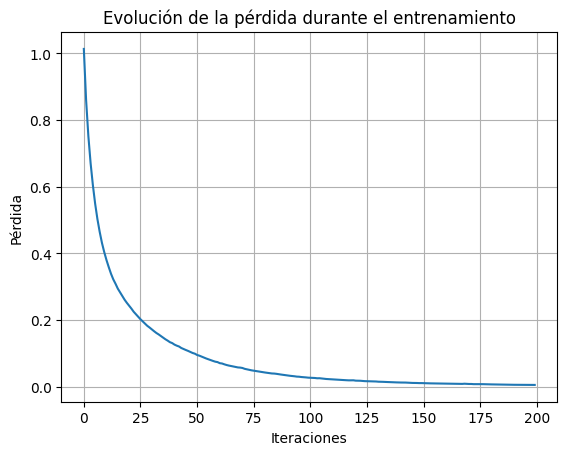

In [17]:
mlp2 = modelo2.named_steps['mlpclassifier']  # accedemos al estimador final

plt.plot(mlp2.loss_curve_)
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid()
plt.show()

In [18]:
pred2 = modelo2.predict(data_test)
pred2[:5]

array(['medio', 'medio', 'medio', 'medio', 'barato'], dtype='<U6')

Precisión del modelo: 0.89
              precision    recall  f1-score   support

      barato       0.95      0.93      0.94       252
        caro       0.81      0.68      0.74        37
       medio       0.82      0.88      0.85       149

    accuracy                           0.89       438
   macro avg       0.86      0.83      0.84       438
weighted avg       0.89      0.89      0.89       438



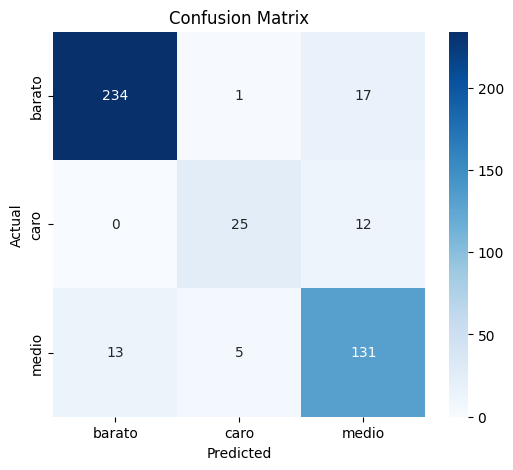

In [19]:
rna.metrics_and_cm(pred2, target_test)

### MODELO 1 (Tuneado)

In [20]:
modelo1B = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(15,10), alpha=0.01))
modelo1B

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.01,
                               hidden_layer_sizes=(15, 10), verbose=True))])

In [21]:
modelo1B.fit(data_train,target_train)

Iteration 1, loss = 1.18145972
Iteration 2, loss = 1.04313349
Iteration 3, loss = 0.93694737
Iteration 4, loss = 0.85078248
Iteration 5, loss = 0.78273910
Iteration 6, loss = 0.72638252
Iteration 7, loss = 0.68143297
Iteration 8, loss = 0.64319798
Iteration 9, loss = 0.60881659
Iteration 10, loss = 0.57899217
Iteration 11, loss = 0.55227250
Iteration 12, loss = 0.52857780
Iteration 13, loss = 0.50701935
Iteration 14, loss = 0.48730228
Iteration 15, loss = 0.46959451
Iteration 16, loss = 0.45329540
Iteration 17, loss = 0.43791823
Iteration 18, loss = 0.42413212
Iteration 19, loss = 0.41054596
Iteration 20, loss = 0.39823869
Iteration 21, loss = 0.38688924
Iteration 22, loss = 0.37606746
Iteration 23, loss = 0.36594710
Iteration 24, loss = 0.35637678
Iteration 25, loss = 0.34694045
Iteration 26, loss = 0.33746502
Iteration 27, loss = 0.32884930
Iteration 28, loss = 0.32062576
Iteration 29, loss = 0.31313410
Iteration 30, loss = 0.30617283
Iteration 31, loss = 0.29916872
Iteration 32, los

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.01,
                               hidden_layer_sizes=(15, 10), verbose=True))])

In [22]:
pred1B = modelo2.predict(data_test)
pred1B[:5]

array(['medio', 'medio', 'medio', 'medio', 'barato'], dtype='<U6')

Precisión del modelo: 0.89
              precision    recall  f1-score   support

      barato       0.95      0.93      0.94       252
        caro       0.81      0.68      0.74        37
       medio       0.82      0.88      0.85       149

    accuracy                           0.89       438
   macro avg       0.86      0.83      0.84       438
weighted avg       0.89      0.89      0.89       438



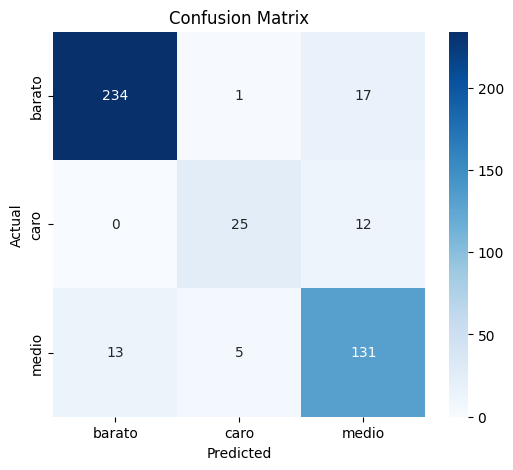

In [23]:
rna.metrics_and_cm(pred1B, target_test)

## Time and Memory Use

In [24]:
import performance

neural_net = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(15,10), alpha=0.01))
performance.time_and_memory(neural_net, data_train, target_train, data_test, "Red Neuronal")

Iteration 1, loss = 0.97151832
Iteration 2, loss = 0.85278540
Iteration 3, loss = 0.76923201
Iteration 4, loss = 0.70121925
Iteration 5, loss = 0.65158960
Iteration 6, loss = 0.61388518
Iteration 7, loss = 0.58269620
Iteration 8, loss = 0.55707996
Iteration 9, loss = 0.53494911
Iteration 10, loss = 0.51530760
Iteration 11, loss = 0.49796538
Iteration 12, loss = 0.48267436
Iteration 13, loss = 0.46862587
Iteration 14, loss = 0.45573920
Iteration 15, loss = 0.44368014
Iteration 16, loss = 0.43245133
Iteration 17, loss = 0.42171596
Iteration 18, loss = 0.41133929
Iteration 19, loss = 0.40188301
Iteration 20, loss = 0.39248550
Iteration 21, loss = 0.38363396
Iteration 22, loss = 0.37527718
Iteration 23, loss = 0.36753185
Iteration 24, loss = 0.36024834
Iteration 25, loss = 0.35322306
Iteration 26, loss = 0.34653131
Iteration 27, loss = 0.34007873
Iteration 28, loss = 0.33396363
Iteration 29, loss = 0.32827305
Iteration 30, loss = 0.32268546
Iteration 31, loss = 0.31726948
Iteration 32, los

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Red Neuronal: 
- Tiempo: 1.63s
- Memoria Peak: 229.66015625 MiB
Predicting Red Neuronal: 
- Tiempo: 3.94s
- Memoria Peak: 229.68359375 MiB


## Modelos de Regresion

In [105]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
import error_metrics

# Data partition
X = features.copy()
y = X.pop("SalePrice")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7,test_size=0.3, random_state=42)

# Preprocessor
num_sel = selector(dtype_exclude=object) 
num_cols = selector_numericas(X)
num_pp = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

cat_sel = selector(dtype_include=object) 
cat_cols = selector_categoricas(X)
cat_pp = OneHotEncoder(handle_unknown="ignore")

rna_pp = ColumnTransformer([
    ('one_hot_encoder',cat_pp,cat_cols),
    ('numerico',num_pp, num_cols)
],remainder="passthrough")

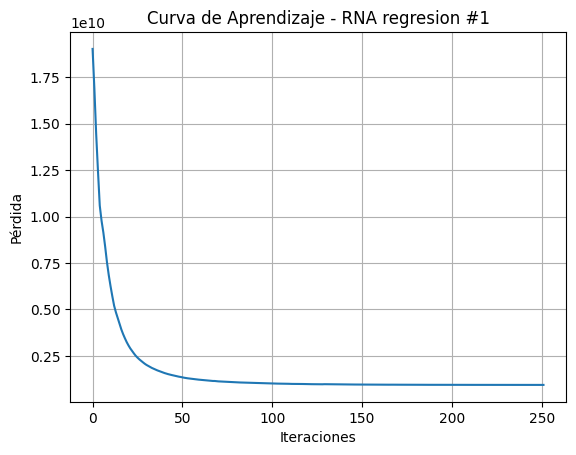

In [328]:
from sklearn.neural_network import MLPRegressor
# Modelos 1 y 2

nn1 = make_pipeline(
    rna_pp, 
    MLPRegressor(
        hidden_layer_sizes=(50),
        max_iter=500,
        activation='tanh',
        solver='sgd'
    )
)

nn1.fit(X_train, y_train)
mplr_1 = nn1.named_steps['mlpregressor'] 
plt.plot(mplr_1.loss_curve_)
plt.title('Curva de Aprendizaje - RNA regresion #1')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid()
plt.show()


RNA regresion #1:
MAE: 31021.12388614339
MSE: 2349811273.247068
RMSE: 48474.851967252755
R²: 0.6632588563942189


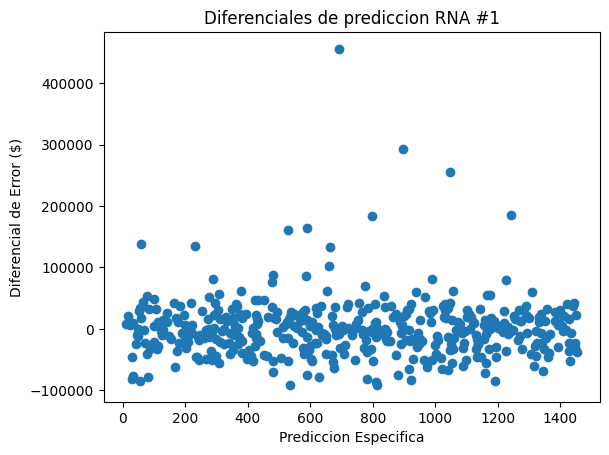

In [329]:
y1_pred = nn1.predict(X_test)
diff = y_test - y1_pred
plt.plot(diff, 'o')
plt.title("Diferenciales de prediccion RNA #1")
plt.xlabel("Prediccion Especifica")
plt.ylabel("Diferencial de Error ($)")

error_metrics.calculate_errors(y1_pred, y_test, "RNA regresion #1")

### - Modelo 2

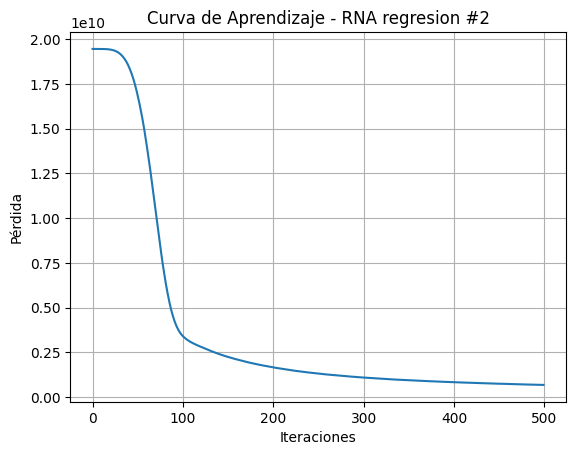

In [330]:
nn2 = make_pipeline(
    rna_pp, 
    MLPRegressor(
        hidden_layer_sizes=(20,40,20),
        max_iter=500,
        activation='relu',
        solver='adam',
        random_state=32
    )
)

nn2.fit(X_train, y_train)
mplr_2 = nn2.named_steps['mlpregressor'] 
plt.plot(mplr_2.loss_curve_)
plt.title('Curva de Aprendizaje - RNA regresion #2')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid()
plt.show()

RNA regresion #2:
MAE: 29642.453924160985
MSE: 1626623891.0085764
RMSE: 40331.42560099477
R²: 0.766895667106998


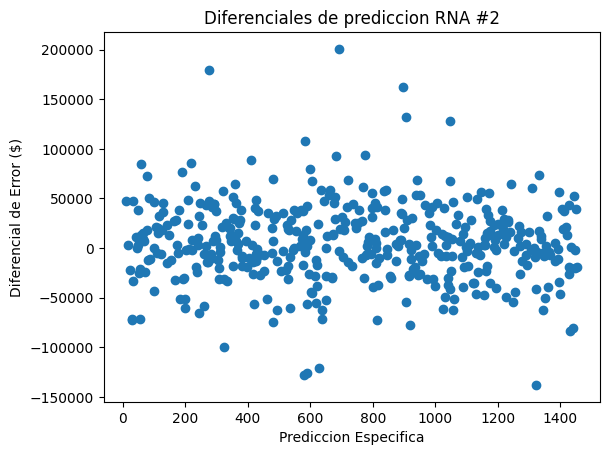

In [331]:
y2_pred = nn2.predict(X_test)
diff2 = y_test - y2_pred
plt.plot(diff2, 'o')
plt.title("Diferenciales de prediccion RNA #2")
plt.xlabel("Prediccion Especifica")
plt.ylabel("Diferencial de Error ($)")
error_metrics.calculate_errors(y2_pred, y_test, "RNA regresion #2")

## Overfitting

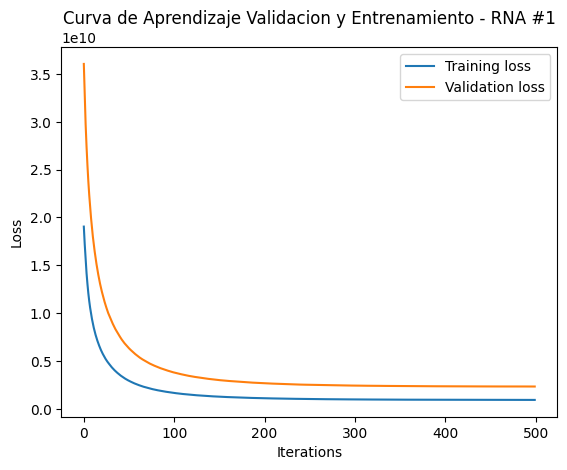

In [334]:
import warnings
warnings.filterwarnings('ignore')

train_loss = []
val_loss = []
nn1_of =nn1 = make_pipeline(rna_pp, MLPRegressor(
    hidden_layer_sizes=(50),
    max_iter=1,
    activation='tanh',
    solver='sgd',
    warm_start=True
))
# Se itera por el numero max de iteraciones que pusimos para este modelo
for i in range(500):
    nn1_of.fit(X_train, y_train)
    train_loss.append(nn1_of.named_steps['mlpregressor'].loss_)
    val_pred = nn1_of.predict(X_test)
    val_loss.append(np.mean((val_pred - y_test) ** 2))

plt.plot(train_loss, label="Training loss")
plt.plot(val_loss, label="Validation loss")
plt.title("Curva de Aprendizaje Validacion y Entrenamiento - RNA #1")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

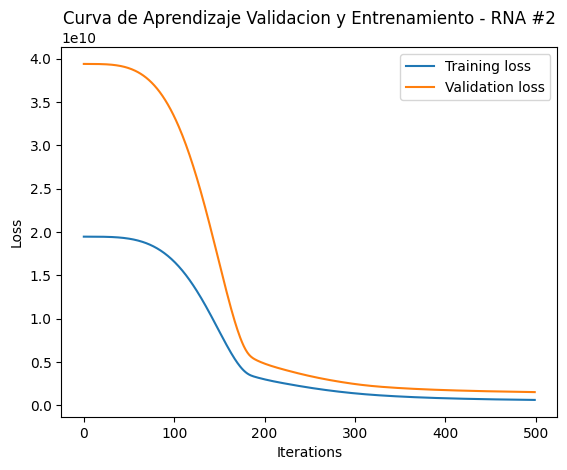

In [335]:
train_loss2 = []
val_loss2 = []
nn2_of = make_pipeline(rna_pp, MLPRegressor(
    hidden_layer_sizes=(20,40,20),
    max_iter=1,
    activation='relu',
    solver='adam',
    random_state=32, # Constancia entre corridas
    warm_start=True # Permite ir debugging las perdias
    
))
# Se itera por el numero max de iteraciones que pusimos para este modelo
for i in range(500):
    nn2_of.fit(X_train, y_train)
    train_loss2.append(nn2_of.named_steps['mlpregressor'].loss_)
    val_pred = nn2_of.predict(X_test)
    val_loss2.append(np.mean((val_pred - y_test) ** 2))

plt.plot(train_loss2, label="Training loss")
plt.plot(val_loss2, label="Validation loss")
plt.title("Curva de Aprendizaje Validacion y Entrenamiento - RNA #2")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Tuneo de Parametros

In [393]:
from sklearn.model_selection import GridSearchCV

search_nn = make_pipeline(rna_pp, MLPRegressor(
    activation='relu',
    solver='adam',
))

search_nn.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'columntransformer', 'mlpregressor', 'columntransformer__force_int_remainder_cols', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__one_hot_encoder', 'columntransformer__numerico', 'columntransformer__one_hot_encoder__categories', 'columntransformer__one_hot_encoder__drop', 'columntransformer__one_hot_encoder__dtype', 'columntransformer__one_hot_encoder__feature_name_combiner', 'columntransformer__one_hot_encoder__handle_unknown', 'columntransformer__one_hot_encoder__max_categories', 'columntransformer__one_hot_encoder__min_frequency', 'columntransformer__one_hot_encoder__sparse_output', 'columntransformer__numerico__memory', 'columntransformer__numerico__steps', 'columntransformer__numerico__transform_i

### 1. Optimizacion de topologia
Como se menciona en el informe, la topologia de las redes neuronales es el aspecto variable mas importante que influye en la capacidad de prediccion de estos modelos. Por lo que, para optimizarlo, primero se evaluaran que combinaciones de capas optimizan el error y luego se procedera a cambiar otros hiperparametros basados en este resultado

In [398]:
param_grid = {
    'mlpregressor__hidden_layer_sizes': (
        # (3,10,7),
        (28,36,19),
        # (7,10,5),
    ),
    'mlpregressor__max_iter': [
            # 250, 
            # 500,
            750
        ],
    'mlpregressor__early_stopping': [
        # True, 
        False
    ],
    'mlpregressor__learning_rate_init': (
        0.001,
        0.01, 
        0.1
    ),
    'mlpregressor__alpha': (
        0.0001,
        0.001,
        0.01,
    ),
    'mlpregressor__epsilon': (
        1e-08,
        1e-06, 
        1e-04
    ),
}
model_grid_search = GridSearchCV(
    search_nn, 
    param_grid=param_grid,
    n_jobs=-1, 
    cv=10
)
model_grid_search.fit(X_train, y_train)
model_grid_search.best_params_

{'mlpregressor__alpha': 0.01,
 'mlpregressor__early_stopping': False,
 'mlpregressor__epsilon': 1e-08,
 'mlpregressor__hidden_layer_sizes': (28, 36, 19),
 'mlpregressor__learning_rate_init': 0.001,
 'mlpregressor__max_iter': 750}

## Mejor modelo de regresion MLP

RNA Mejor Modelo:
MAE: 26556.463890694646
MSE: 1359947726.206122
RMSE: 36877.469086233694
R²: 0.8051118582242922


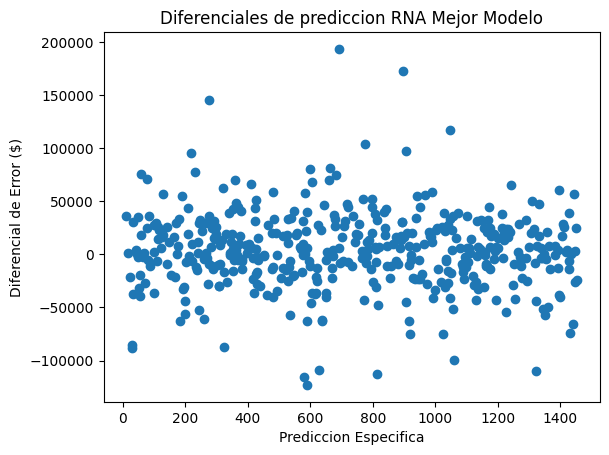

In [399]:

best_nn = model_grid_search.best_estimator_
best_nn.fit(X_train, y_train)
y_best =best_nn.predict(X_test)

diff_best = y_test - y_best
plt.plot(diff_best, 'o')
plt.title("Diferenciales de prediccion RNA Mejor Modelo")
plt.xlabel("Prediccion Especifica")
plt.ylabel("Diferencial de Error ($)")
error_metrics.calculate_errors(y_best, y_test, "RNA Mejor Modelo")

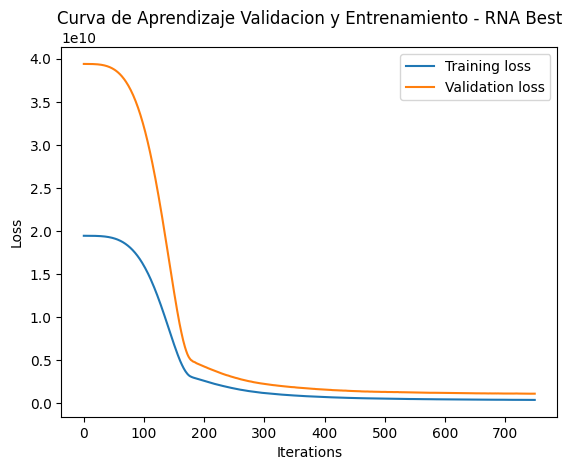

Training Loss RSME:  20363.45134358697
Validation Loss RSME:  33736.56732187543


In [400]:
train_lossb = []
val_lossb = []
best_nn_of = make_pipeline(
    rna_pp, 
    MLPRegressor(
        # Algoritmos
        activation='relu',
        solver='adam',
        # Best params
        hidden_layer_sizes= (28, 36, 19),
        learning_rate_init=0.001,
        alpha=0.01,
        epsilon=1e-08,
        early_stopping=False,
        # Debugging
        max_iter=1,
        warm_start=True
    )
)
# Se itera por el numero max de iteraciones que pusimos para este modelo
for i in range(750):
    best_nn_of.fit(X_train, y_train)
    train_lossb.append(best_nn_of.named_steps['mlpregressor'].loss_)
    val_pred = best_nn_of.predict(X_test)
    val_lossb.append(np.mean((val_pred - y_test) ** 2))


plt.plot(train_lossb, label="Training loss")
plt.plot(val_lossb, label="Validation loss")
plt.title("Curva de Aprendizaje Validacion y Entrenamiento - RNA Best")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()
print("Training Loss RSME: ",np.sqrt(train_lossb.pop()))
print("Validation Loss RSME: ",np.sqrt(val_lossb.pop()))